In [3]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Example of loading a CSV file with pandas
# df = pd.read_csv('/kaggle/input/your-dataset.csv')

# Display the first few rows of the dataframe
# print(df.head())


### Train dataset

In [12]:
import pandas as pd

# Replace with the path to your ZIP file
zip_file_path = r"C:\Users\User\OneDrive - Sunway Education Group\Desktop\train.csv.zip"

# Load the CSV file from the ZIP archive
train_df = pd.read_csv(zip_file_path, compression='zip')

# Display the first few rows of the dataframe
print(train_df.head())
train_df.describe ()

   id class  cap-diameter cap-shape cap-surface cap-color  \
0   0     e          8.80         f           s         u   
1   1     p          4.51         x           h         o   
2   2     e          6.94         f           s         b   
3   3     e          3.88         f           y         g   
4   4     e          5.85         x           l         w   

  does-bruise-or-bleed gill-attachment gill-spacing gill-color  ...  \
0                    f               a            c          w  ...   
1                    f               a            c          n  ...   
2                    f               x            c          w  ...   
3                    f               s          NaN          g  ...   
4                    f               d          NaN          w  ...   

   stem-root  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0        NaN           NaN          w       NaN        NaN        f         f   
1        NaN             y          o       

,id,cap-diameter,stem-height,stem-width
count,3.116945e+06,3.116941e+06,3.116945e+06,3.116945e+06
mean,1.558472e+06,6.309848e+00,6.348333e+00,1.115379e+01
std,8.997847e+05,4.657931e+00,2.699755e+00,8.095477e+00
min,0.000000e+00,3.000000e-02,0.000000e+00,0.000000e+00
25%,7.792360e+05,3.320000e+00,4.670000e+00,4.970000e+00
50%,1.558472e+06,5.750000e+00,5.880000e+00,9.650000e+00
75%,2.337708e+06,8.240000e+00,7.410000e+00,1.563000e+01
max,3.116944e+06,8.067000e+01,8.872000e+01,1.029000e+02


### Test dataset

In [6]:
import pandas as pd

# Replace with the path to your ZIP file
zip_file_path1 = r"C:\Users\User\OneDrive - Sunway Education Group\Desktop\test.csv.zip"

# Load the CSV file from the ZIP archive
test_df = pd.read_csv(zip_file_path1, compression='zip')

# Display the first few rows of the dataframe
test_df.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


### Sample Submission

In [8]:
import pandas as pd

# Replace with the path to your ZIP file
zip_file_path2 = r"C:\Users\User\OneDrive - Sunway Education Group\Desktop\sample_submission.csv.zip"

# Load the CSV file from the ZIP archive
sample_submission = pd.read_csv(zip_file_path2, compression='zip')

# Display the first few rows of the dataframe
sample_submission.head()

,id,class
0,3116945,e
1,3116946,e
2,3116947,e
3,3116948,e
4,3116949,e


### Type of train set and check for missing value


In [14]:
print(train_df.dtypes)

# check for missing value
train_df.isnull().sum().to_string()

num_cols = train_df.select_dtypes(include=['float64']).columns
print(num_cols)

# replace missing value with mean
train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].mean())
train_df.describe()

id                        int64
class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object
Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object')


,id,cap-diameter,stem-height,stem-width
count,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06
mean,1.558472e+06,6.309848e+00,6.348333e+00,1.115379e+01
std,8.997847e+05,4.657928e+00,2.699755e+00,8.095477e+00
min,0.000000e+00,3.000000e-02,0.000000e+00,0.000000e+00
25%,7.792360e+05,3.320000e+00,4.670000e+00,4.970000e+00
50%,1.558472e+06,5.750000e+00,5.880000e+00,9.650000e+00
75%,2.337708e+06,8.240000e+00,7.410000e+00,1.563000e+01
max,3.116944e+06,8.067000e+01,8.872000e+01,1.029000e+02


### Type of test set and check for missing value

In [16]:
print(test_df.dtypes)

# check for missing value
test_df.isnull().sum().to_string()

num_cols1 = test_df.select_dtypes(include=['float64']).columns
print(num_cols1)

# replace missing value with mean
test_df[num_cols1] = test_df[num_cols].fillna(test_df[num_cols1].mean())
test_df.describe()

id                        int64
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object
Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object')


,id,cap-diameter,stem-height,stem-width
count,2.077964e+06,2.077964e+06,2.077964e+06,2.077964e+06
mean,4.155926e+06,6.306192e+00,6.346509e+00,1.114837e+01
std,5.998567e+05,4.685455e+00,2.698977e+00,8.100181e+00
min,3.116945e+06,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.636436e+06,3.310000e+00,4.670000e+00,4.970000e+00
50%,4.155926e+06,5.740000e+00,5.880000e+00,9.640000e+00
75%,4.675417e+06,8.230000e+00,7.410000e+00,1.562000e+01
max,5.194908e+06,6.070000e+02,5.729000e+01,1.029100e+02


### Value count for each class

class
p    1705396
e    1411549
Name: count, dtype: int64


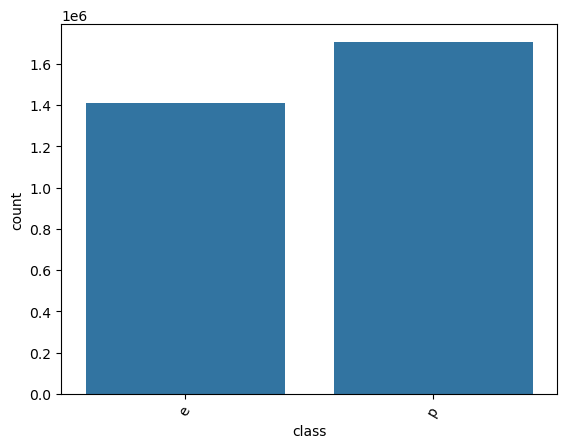

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
print(train_df['class'].value_counts())
sns.countplot(x='class',data=train_df)
plt.xticks(rotation=60)
plt.show()


### Replace categorical variables with mode

In [19]:
cat_cols = list(train_df.select_dtypes(include=['object']).columns.difference(['class']))

for col in cat_cols:
    mode_value = train_df[col].mode()[0]
    train_df[col].fillna(mode_value, inplace=True)
    
cat_cols1 = list(test_df.select_dtypes(include=['object']).columns.difference(['class']))    
for col in cat_cols1:
    mode_value = test_df[col].mode()[0]
    test_df[col].fillna(mode_value, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_12216\1769144268.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(mode_value, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12216\1769144268.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

### Encode categorical variable to numeric

In [21]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
train_df[cat_cols] = encoder.fit_transform(train_df[cat_cols])
test_df[cat_cols1] = encoder.transform(test_df[cat_cols1])

In [24]:
labelencoder = LabelEncoder()
train_df['class'] = labelencoder.fit_transform(train_df['class'])

### Correlation matrix

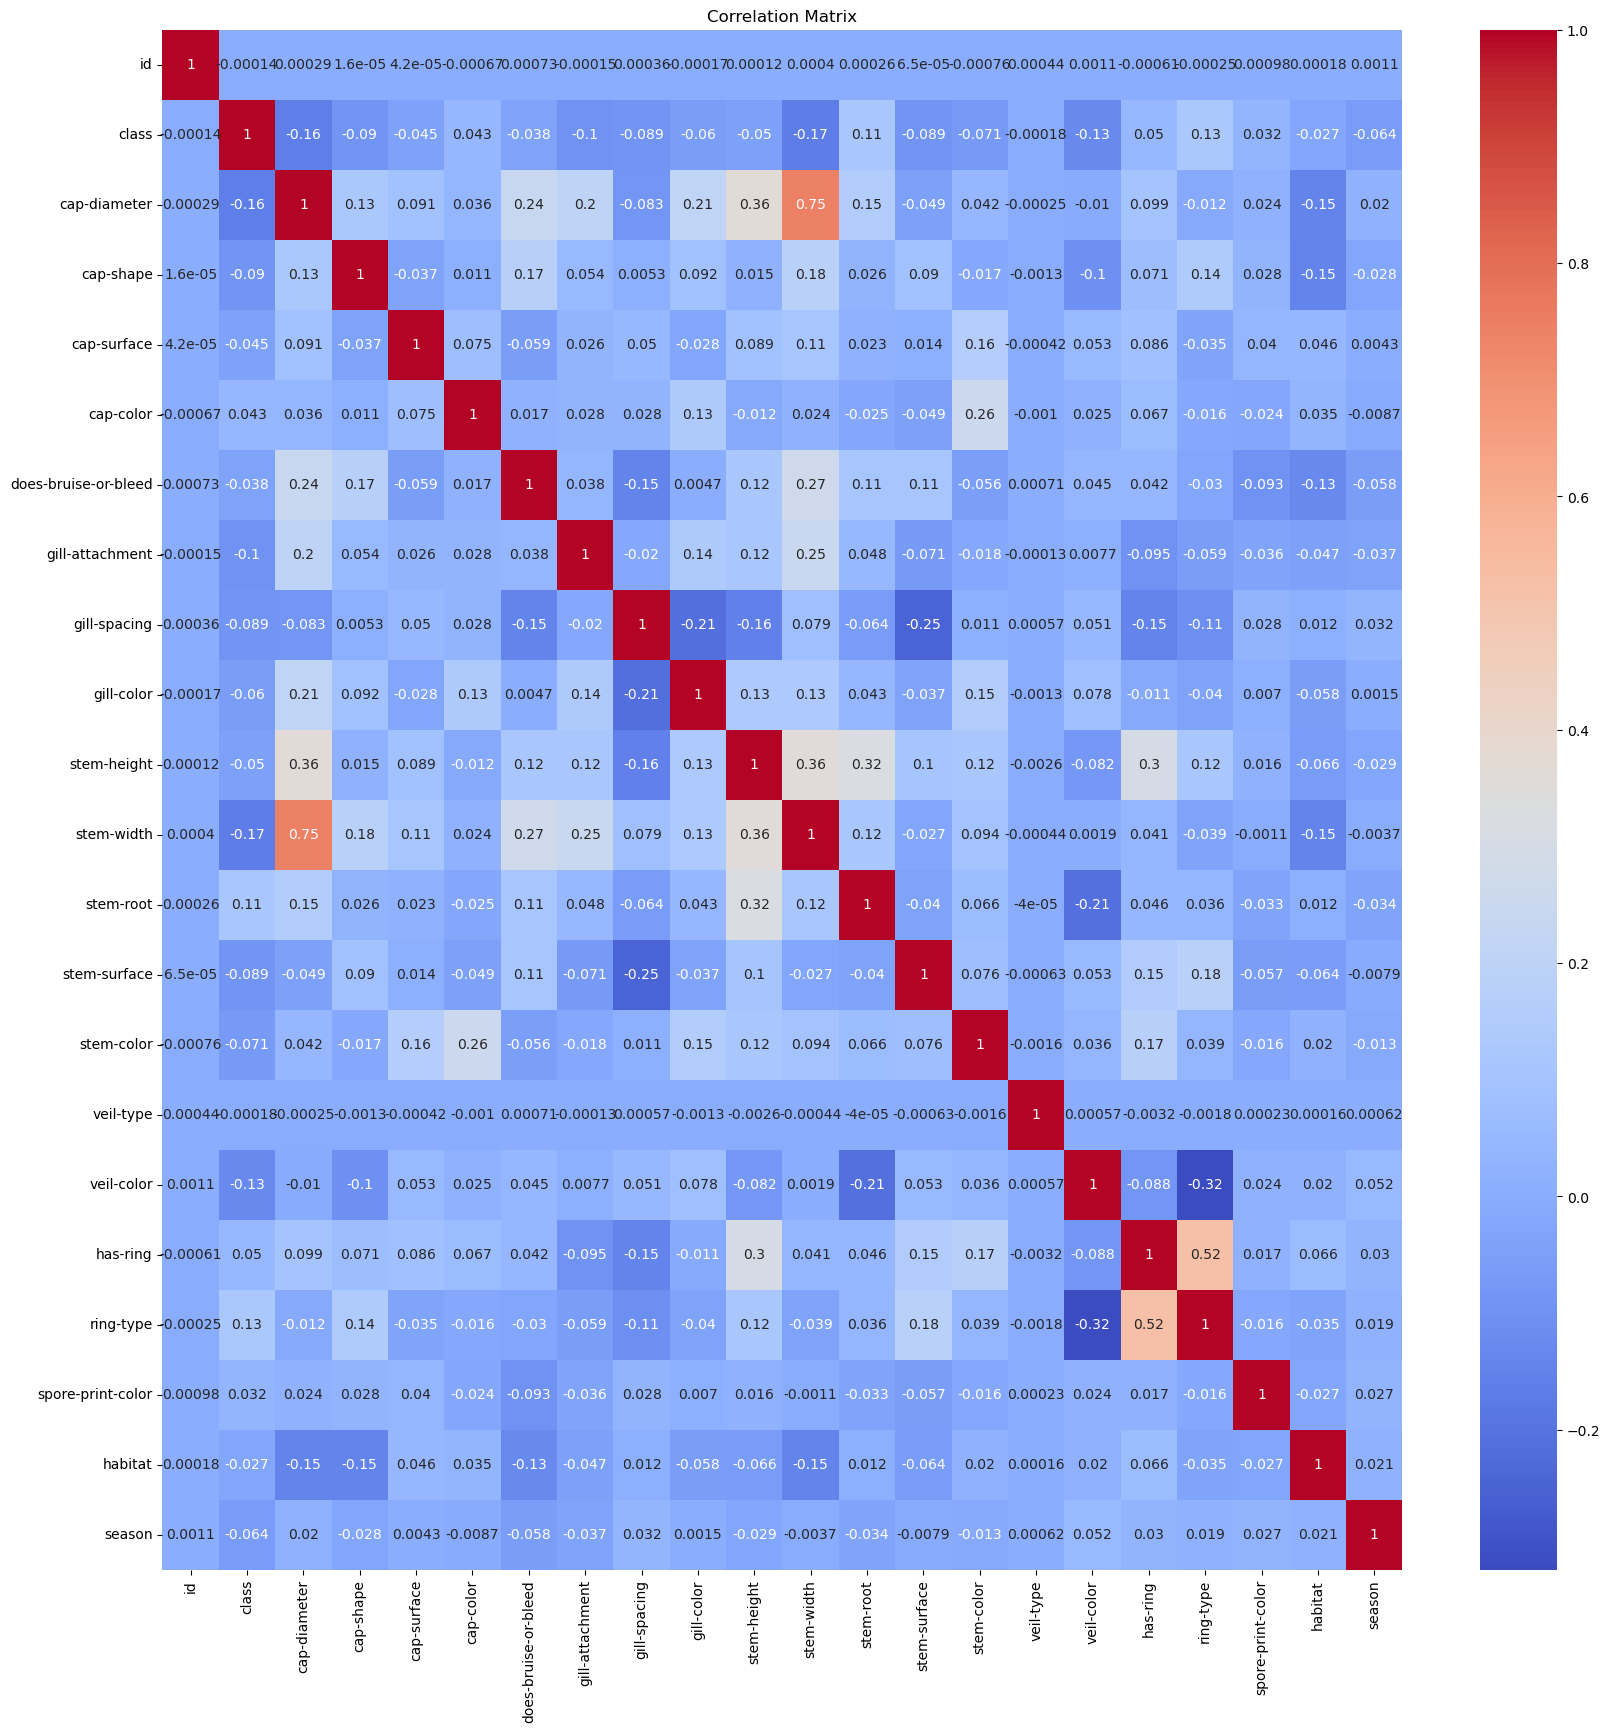

In [26]:
df_dropped = train_df.dropna()

# Encode categorical variables
df_encoded = df_dropped.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [28]:
train_df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,0,8.80,53.0,72.0,72.0,8.0,44.0,28.0,59.0,...,15.0,51.0,55.0,19.0,21.0,5.0,18.0,17.0,25.0,0.0
1,1,1,4.51,71.0,56.0,64.0,8.0,44.0,28.0,46.0,...,15.0,58.0,47.0,19.0,21.0,18.0,39.0,17.0,25.0,3.0
2,2,0,6.94,53.0,72.0,49.0,8.0,75.0,28.0,59.0,...,15.0,51.0,46.0,19.0,21.0,5.0,18.0,17.0,36.0,3.0
3,3,0,3.88,53.0,81.0,57.0,8.0,70.0,28.0,37.0,...,15.0,51.0,55.0,19.0,21.0,5.0,18.0,17.0,25.0,2.0
4,4,0,5.85,71.0,65.0,74.0,8.0,47.0,28.0,59.0,...,15.0,51.0,55.0,19.0,21.0,5.0,18.0,17.0,29.0,0.0


In [30]:
X = train_df.drop(['id','class'], axis=1)
y = train_df['class']
test = test_df.drop(['id'], axis=1)
X.shape,y.shape

((3116945, 20), (3116945,))

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_features=1.0, max_depth=3, 
                          n_estimators=100, random_state=0)
RF = RF.fit(X_train, y_train)

##
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = RF.predict(X_test)
acc_rf=accuracy_score(y_test,y_pred)
print(acc_rf)


from sklearn.tree import plot_tree
estimator = RF.estimators_[0]
plt.figure(figsize=(200,100))
plot_tree(estimator,feature_names=X.columns,class_names=['p', 'e'],filled=True,fontsize=100)
plt.title('Random Forest Visualization')
plt.show()

# Confusion matrix
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
print(confusion_matrix(y_test,y_pred))


### Finding best parameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the parameter grid
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=10)],  # Number of trees
    'max_depth': [int(x) for x in np.linspace(10, 100, num=10)] + [None],       # Max depth of trees
    'max_features': ['auto', 'sqrt'],  # Number of features to consider for each split
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]         # Method of selecting samples for training each tree
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=1)

# Initialize RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf, 
                                      param_distributions=param_dist, 
                                      n_iter=100,   # Number of parameter settings that are sampled
                                      cv=5,        # 5-fold cross-validation
                                      verbose=2,   # Print progress messages
                                      random_state=1, 
                                      n_jobs=-1)   # Use all available cores

# Fit the model
rf_random_search.fit(X, y)

# Get the best parameters and the best score
best_params = rf_random_search.best_params_
best_score = rf_random_search.best_score_

print(f"Best cross-validation accuracy: {best_score:.4f}")
print(f"Best parameters: {best_params}")


In [50]:
preds = RF.predict(test)
predictions = labelencoder.inverse_transform(preds)
submission = pd.DataFrame({'id': test_df.id, 'class': predictions})
submission.to_csv('submission_by_rf.csv', index=False)

In [42]:
submission['class'].value_counts()

class
e    1129670
p     948294
Name: count, dtype: int64